# Stackoverflow Tag Prediction

## Business Problem

Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.

Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.


## Problem Statemtent

Suggest the tags based on the content that was there in the question posted on Stackoverflow.



### Data Source

Source: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/



## Real World / Business Objectives and Constraints

1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.




### Data Overview

Train.csv contains 4 columns: Id,Title,Body,Tags.

Test.csv contains the same columns but without the Tags, which you are to predict.

Size of Train.csv - 6.75GB

Number of rows in Train.csv = 6034195

The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).

### Data Field Explaination

Dataset contains 6,034,195 rows. The columns in the table are:

Id - Unique identifier for each question

Title - The question's title

Body - The body of the question

Tags - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')


### Example Datapoint

Title:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
Body : 


        #include<
        iostream>\n
        #include<
        stdlib.h>\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout<<"Enter the number of variables";\n         cin>>n;\n\n         
                 cout<<"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y<n+1; y++)\n         
                 {\n                 
                    cin>>m[y];\n                 
                    cin>>u[y];\n         
                 }\n         
                 for(x=1; x<n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1<n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i<n+1; i++)\n         
                 {\n            
                    for(int l=1; l<=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout<<a[l]<<"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j<4; j++)\n            
                    {\n                
                        cout<<e[i][j];\n                
                        for(int k=0; k<n-(i+1); k++)\n                
                        {\n                    
                            cout<<a[k]<<"\\t";\n               
                        }\n                
                        cout<<"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        

\n\n
        

The answer should come in the form of a table like
\n\n
        

       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        

\n\n
        

if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)
\n\n
        

The output is not coming,can anyone correct the code or tell me what\'s wrong?
\n'
Tags : 'c++ c'




### Mapping problem to Machine Learning Problem
#### Type of Machine Learning Problem

It is a multi-label classification problem
Multi-label Classification: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these.
Credit: http://scikit-learn.org/stable/modules/multiclass.html



### Key Performance Index

Micro-Averaged F1-Score (Mean F Score) : The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class.

'Micro f1 score':
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.

'Macro f1 score':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

https://www.kaggle.com/wiki/MeanFScore
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine
import datetime as dt
from nltk.corpus import stopwords
import datetime
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import tqdm

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
# from skmultilearn.adapt import mlknn
# from skmultilearnproblem_transform import ClassifierChain
# from skmultilearn.problem_transform import BinaryRelevance
# from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime




# 1. Exploratory Data Analysis
### 1.1 Reading Data

In [2]:
import tqdm
if not os.path.isfile('train1.db'):
    start = datetime.now()
    disk_engine = create_engine('sqlite:///train1.db')
    start = datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in tqdm.tqdm(pd.read_csv('Train.csv',names = ['Id','Title', 'Body', 'Tags'], chunksize=chunksize, iterator=True, encoding='utf-8',nrows = 1000000)):
        df.index+=index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1
    print("Time taken to run this cell :", datetime.now() - start)

### 1.2 Counting number of rows

In [3]:
if os.path.isfile('train1.db'):
    start = dt.datetime.now()
    con = sqlite3.connect('train1.db')
    num_rows = pd.read_sql_query("""SELECT count(*) FROM data""", con)
    #Always remember to close the database
    print("Number of rows in the database :","\n",num_rows['count(*)'].values[0])
    con.close()
    print("Time taken to count the number of rows :", dt.datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cell to genarate train.db file")

Number of rows in the database : 
 1000000
Time taken to count the number of rows : 0:00:00.493164


### 1.3 Checking and deleting the Duplicates

In [4]:
if os.path.isfile('train1.db'):
    start = datetime.now()
    con = sqlite3.connect('train1.db')
    df_no_dup = pd.read_sql_query('SELECT TITLE,BODY,TAGS,COUNT(*) as cnt_dup From data GROUP By Title,body,tags',con)
    con.close()
    print("time taken to run this cell : ",datetime.now()-start)
else:
    print("please download the train.db file from drive or run the first to ")

time taken to run this cell :  0:00:41.436268


In [5]:
df_no_dup.head()

,Title,Body,Tags,cnt_dup
0,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1
1,"""SQL Injection"" issue preventing correct for...",<p>So I've been checking everything I can thin...,php forms,1
2,Undefined symbols for architecture i386: _OB...,<p>I have imported framework for sending email...,iphone email-integration,1
3,obtaining updated locations using gps in ser...,<p>I have app in which i have two buttons <str...,android android-widget android-service,1
4,"$f$ a continuous function in [0,1], Show: $\l...","<p>Let $f$ be a continuous function in [0,1] a...",calculus,2


In [6]:
print("number of duplicate questions :", num_rows['count(*)'].values[0]- df_no_dup.shape[0], "(",(1-((df_no_dup.shape[0])/(num_rows['count(*)'].values[0])))*100,"% )")

number of duplicate questions : 56418 ( 5.641799999999996 % )


In [7]:
df_no_dup.cnt_dup.value_counts()

1    888457
2     53832
3      1293
Name: cnt_dup, dtype: int64

In [8]:
count = 0
Nonetype = type(None)
for tag in df_no_dup['Tags']:
    try:
        if len(tag)==0:
            print(count)
    except:
        pass
    if isinstance(tag,Nonetype):
        print(count)
    count+=1

174937


In [9]:
df_no_dup.drop([174937,777547
],inplace = True)

In [10]:
start = datetime.now()
df_no_dup['tag_count'] = df_no_dup['Tags'].apply(lambda text : len(text.split(" ")))
print("Time taken to run this cell : ",datetime.now()-start)
df_no_dup.head()

Time taken to run this cell :  0:00:01.368880


,Title,Body,Tags,cnt_dup,tag_count
0,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1,3
1,"""SQL Injection"" issue preventing correct for...",<p>So I've been checking everything I can thin...,php forms,1,2
2,Undefined symbols for architecture i386: _OB...,<p>I have imported framework for sending email...,iphone email-integration,1,2
3,obtaining updated locations using gps in ser...,<p>I have app in which i have two buttons <str...,android android-widget android-service,1,3
4,"$f$ a continuous function in [0,1], Show: $\l...","<p>Let $f$ be a continuous function in [0,1] a...",calculus,2,1


In [11]:
df_no_dup.tag_count.value_counts()

3    270001
2    250989
4    181406
1    129669
5    111515
Name: tag_count, dtype: int64

In [12]:
tag_data = df_no_dup['Tags']

In [13]:
if not os.path.isfile('train_no_dup.db'):
    disk_dup = create_engine("sqlite:///train_no_dup.db")
    no_dup = pd.DataFrame(df_no_dup, columns=['Title', 'Body', 'Tags'])
    no_dup.to_sql('no_dup_train',disk_dup)

### 1.4 Analysis of Tags

#### Total number of unique tags

In [14]:
vectorizer = CountVectorizer(tokenizer = lambda x:x.split())
tag_dtm = vectorizer.fit_transform(tag_data)

In [15]:
print("Number of data points : ",tag_dtm.shape[0])
print("Number of unique tags : ",tag_dtm.shape[1])

Number of data points :  943580
Number of unique tags :  34945


In [16]:
tags = vectorizer.get_feature_names()
print("some of the tags we have : ",tags[:10])

some of the tags we have :  ['.a', '.app', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store', '.each']


#### Number of times a tag appeared

In [17]:
freqs = tag_dtm.sum(axis = 0).A1
result = dict(zip(tags,freqs))

In [18]:
if not os.path.isfile("tag_counts_dict_dtm.csv"):
    with open("tag_counts_dict_dtm.csv",'w') as csv_file:
        writer = csv.writer(csv_file)
        for key,value in result.items():
            writer.writerow([key,value])
tag_df = pd.read_csv("tag_counts_dict_dtm.csv",names = ['Tags','Counts'])
tag_df.head()

,Tags,Counts
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138


In [19]:
tag_df_sorted = tag_df.sort_values(['Counts'],ascending = False)
tag_counts = tag_df_sorted['Counts'].values

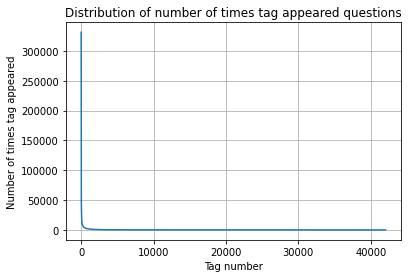

In [20]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

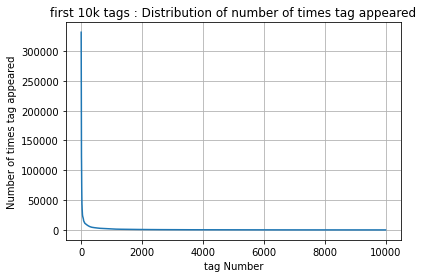

400 [331505  44829  22429  17728  13364  11162  10029   9148   8054   7151
   6466   5865   5370   4983   4526   4281   4144   3929   3750   3593
   3453   3299   3123   2986   2891   2738   2647   2527   2431   2331
   2259   2186   2097   2020   1959   1900   1828   1770   1723   1673
   1631   1574   1532   1479   1448   1406   1365   1328   1300   1266
   1245   1222   1197   1181   1158   1139   1121   1101   1076   1056
   1038   1023   1006    983    966    952    938    926    911    891
    882    869    856    841    830    816    804    789    779    770
    752    743    733    725    712    702    688    678    671    658
    650    643    634    627    616    607    598    589    583    577
    568    559    552    545    540    533    526    518    512    506
    500    495    490    485    480    477    469    465    457    450
    447    442    437    432    426    422    418    413    408    403
    398    393    388    385    381    378    374    370    367    365
  

In [21]:
plt.plot(tag_counts[:10000])
plt.title("first 10k tags : Distribution of number of times tag appeared")
plt.grid()
plt.xlabel("tag Number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:10000:25]),tag_counts[0:10000:25])

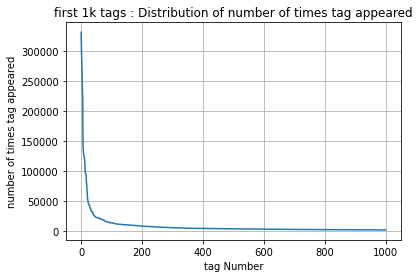

200 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483
   3453   3427   3396   3363   3326   3299   3272   3232   3196   3168
   3123   3094   3073   3050   3012   2986   2983   2953   2934   2903
   2891   2844   2819   2784   2754   2738   2726   2708   2681   2669
   2647   2621   2604   2594   2556   2527   2510   2482   2460   2444
  

In [22]:
plt.plot(tag_counts[0:1000])
plt.title("first 1k tags : Distribution of number of times tag appeared")
plt.grid()
plt.xlabel("tag Number")
plt.ylabel("number of times tag appeared")
plt.show()
print(len(tag_counts[0:1000:5]),tag_counts[0:1000:5])

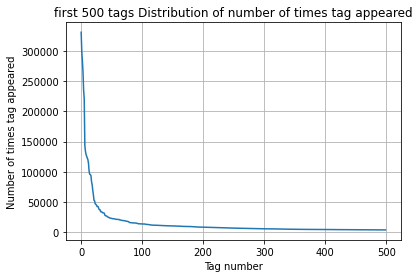

100 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483]


In [23]:
plt.plot(tag_counts[0:500])
plt.title("first 500 tags Distribution of number of times tag appeared")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:500:5]),tag_counts[0:500:5])

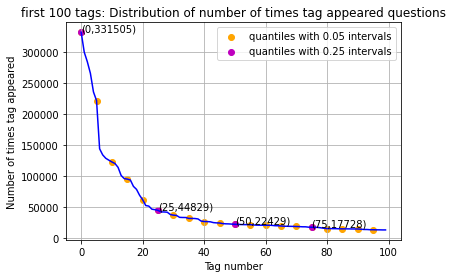

20 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703]


In [24]:
plt.plot(tag_counts[0:100],c = 'b')
plt.scatter(x = list(range(0,100,5)),y = tag_counts[0:100:5],c = 'orange',label = "quantiles with 0.05 intervals")
plt.scatter(x = list(range(0,100,25)),y = tag_counts[0:100:25],c = 'm',label = 'quantiles with 0.25 intervals')

for x,y in zip(list(range(0,100,25)),tag_counts[0:100:25]):
    plt.annotate(s = "({},{})".format(x,y),xy = (x,y),xytext = (x-0.05,y+500))

plt.title("first 100 tags: Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]),tag_counts[0:100:5])

In [25]:
lst_tags_gt_10k = tag_df[tag_df.Counts>10000].Tags

print("{} Tags are used more tahn 10000 times".format(len(lst_tags_gt_10k)))
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags

print("{} Tags are used more than 100000 times".format(len(lst_tags_gt_100k)))

153 Tags are used more tahn 10000 times
14 Tags are used more than 100000 times


# Tags Per Questions

In [26]:
tag_quest_count = tag_dtm.sum(axis = 1).tolist()
tag_quest_count = [int(j) for i in tag_quest_count for j in i]
print("we have total {} datapoints.".format(len(tag_quest_count)))
print(tag_quest_count[:5])

we have total 943580 datapoints.
[3, 2, 2, 3, 1]


In [27]:
print("Maximum number of tags per question: %d"%max(tag_quest_count))
print("Minimum number of tags per question: %d"%min(tag_quest_count))
print("Avg. number of tags per question: %f"%((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.887777


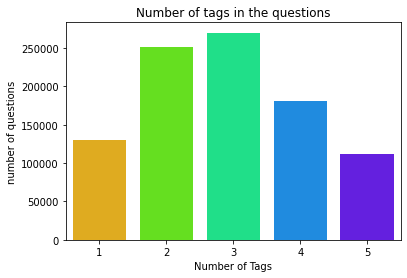

In [28]:
sns.countplot(tag_quest_count,palette = 'gist_rainbow')
plt.title("Number of tags in the questions")
plt.xlabel("Number of Tags")
plt.ylabel("number of questions")
plt.show()



#### Observations:

1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.899
4. Most of the questions are having 2 or 3 tags



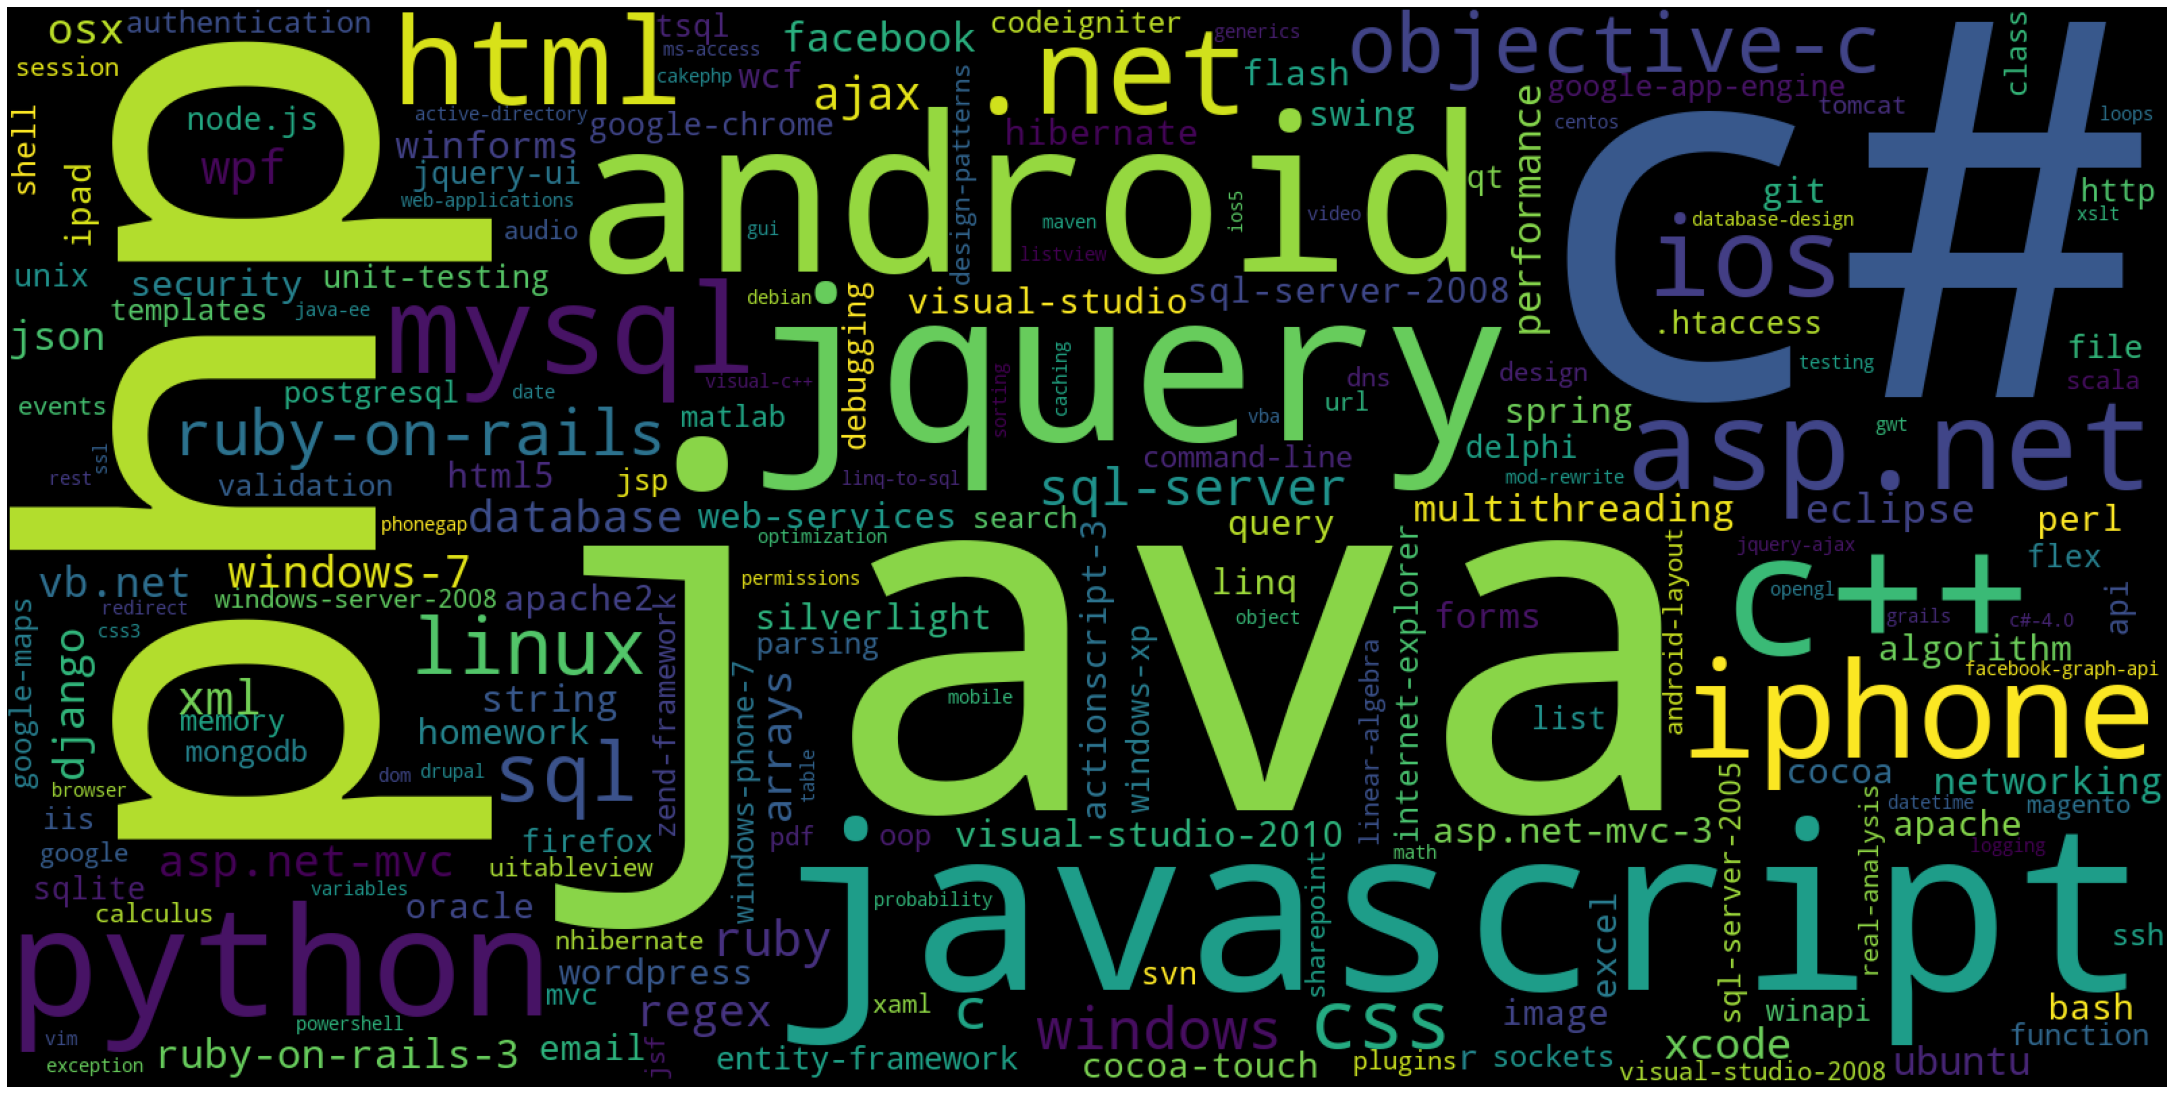

timetaken to run this cell :  0:00:11.759430


In [29]:
start = datetime.now()

tup = dict(result.items())
wordcloud = WordCloud(
    background_color = 'black',
    width = 1600,
    height = 800,
).generate_from_frequencies(tup)

fig = plt.figure(figsize = (30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
fig.savefig('tag.png')
plt.show()
print("timetaken to run this cell : ",datetime.now()-start)

In [30]:
print(tag_df_sorted['Tags'].values)

['c#' 'java' 'php' ... 'rbar' 'azureus' 'zzt-oop']


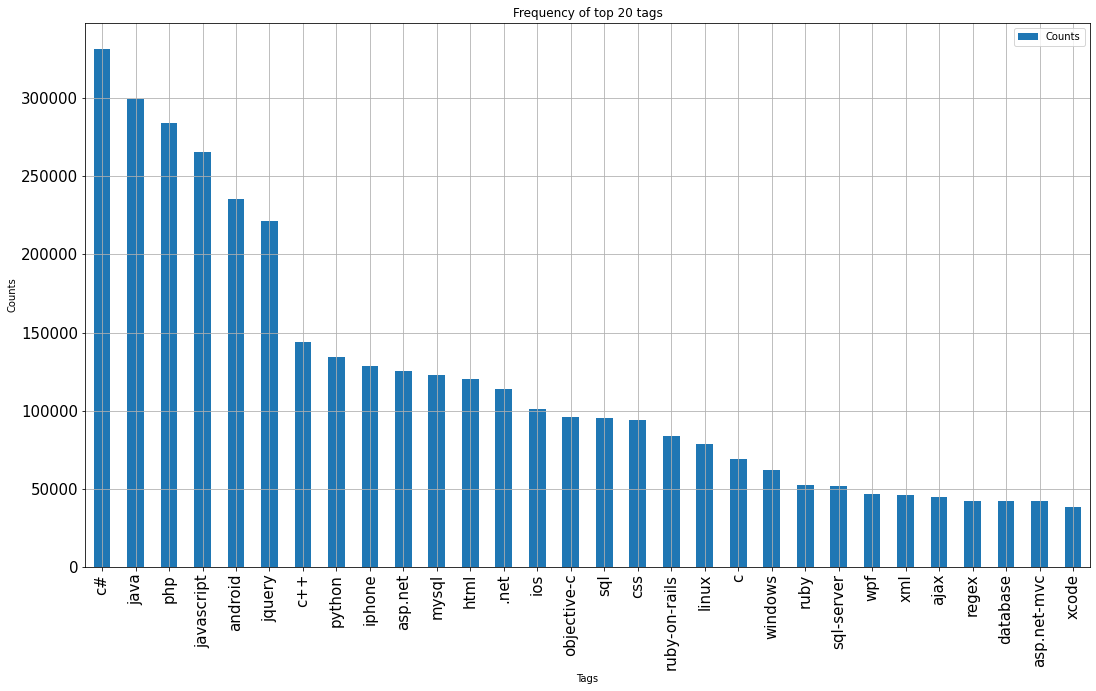

In [34]:
i = np.arange(30)
axes = tag_df_sorted.head(30).plot(x = 'Tags',kind = 'bar', figsize = (18, 10), fontsize = 15, grid = True)
plt.title("Frequency of top 20 tags")
plt.xticks(i,tag_df_sorted['Tags'].values[:30])
plt.xlabel("Tags")
plt.ylabel("Counts")
plt.show()


# PreProcessing

In [35]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr,' ',str(data))
    return cleantext
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vikra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Processed.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [37]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table
start = datetime.now()
read_db = 'train_no_dup.db'
write_db = 'Processed.db'
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        print("1")
        reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 500000;")
        print("2")
if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        print("3")
        tables = checkTableExists(conn_w)
        print("4")
        writer =conn_w.cursor()
        print("5")
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")
print("Time taken to run this cell :", datetime.now() - start)

1
2
3
Tables in the databse:
QuestionsProcessed
4
5
Cleared All the rows
Time taken to run this cell : 0:04:42.925553


In [38]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/
nltk.download('punkt')
start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in tqdm.tqdm(reader):

    is_code = 0

    title, question, tags = row[0], row[1], row[2]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vikra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100064it [04:32, 445.73it/s]

number of questions completed= 100000


200053it [08:41, 563.67it/s]

number of questions completed= 200000


300062it [13:04, 439.76it/s]

number of questions completed= 300000


400039it [17:30, 319.40it/s]

number of questions completed= 400000


499999it [22:31, 370.07it/s]

Avg. length of questions(Title+Body) before processing: 1151
Avg. length of questions(Title+Body) after processing: 327
Percent of questions containing code: 56
Time taken to run this cell : 0:22:31.116757


In [39]:
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

In [40]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader = conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print("="*50)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*50)
            
conn_r.commit()
conn_r.close()

Questions after preprocessed
('cross domain ajax rest servic http header investig cross domain problem rest servic call nchrome said request header field request allow access control allow header nthis got network header tab could somebodi explain http header problem header check server fail header check client side browser fail idea access header explain detail simpl word get feel rest learn self thank advanc',)
--------------------------------------------------
('silent option account registr dont work tri check still see vm registr login page disabl cach login modul site see action www webtasti com tri purchas smth redirect login page click checkout remov registr login page want use paypal payment dont need registr thank ps tpvmcheckoutlogin modul page display login block latest vm version patch',)
--------------------------------------------------
('eclips overrid exist project file import exist project work exist project wd git file repositori import project eclips replac file con

In [41]:
write_db = 'Processed.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question,Tags FROM QuestionsProcessed""",conn_r)
conn_r.commit()
conn_r.close()

In [42]:
preprocessed_data['question'][:5].values

array(['gui toolkit made c like gtk wxwidget im hard time wrap head around ive look sourc code wxwidget see window api function sight would like creat custom control use window api',
       'cross domain ajax rest servic http header investig cross domain problem rest servic call nchrome said request header field request allow access control allow header nthis got network header tab could somebodi explain http header problem header check server fail header check client side browser fail idea access header explain detail simpl word get feel rest learn self thank advanc',
       'silent option account registr dont work tri check still see vm registr login page disabl cach login modul site see action www webtasti com tri purchas smth redirect login page click checkout remov registr login page want use paypal payment dont need registr thank ps tpvmcheckoutlogin modul page display login block latest vm version patch',
       'eclips overrid exist project file import exist project work exist 

In [43]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499999 entries, 0 to 499998
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   question  499999 non-null  object
 1   tags      499999 non-null  object
dtypes: object(2)
memory usage: 7.6+ MB


In [44]:
print("number of data points in sample : ",preprocessed_data.shape[0])
print("number of dimensions : ",preprocessed_data.shape[1])

number of data points in sample :  499999
number of dimensions :  2


# Machine Learning Models

### Converting tags for multilabel problems

In [45]:
# binary = 'true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(),binary = 'true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

In [46]:
print(multilabel_y[67])

  (0, 16015)	1


In [47]:
multilabel_y.get_shape()

(499999, 30670)

In [48]:
vectorizer.get_feature_names()[17129]

'mvc'

In [49]:
def tags_to_choose(n):
    global sorted_tags_i
    t = multilabel_y.sum(axis = 0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)),key = lambda i:t[i],reverse = True)
    multilabel_yn = multilabel_y[:,sorted_tags_i[:n]]
    
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x = multilabel_yn.sum(axis = 1)
    return (np.count_nonzero(x==0))

In [57]:
questions_explained = []
numberOfTags = []
total_tags = multilabel_y.shape[1]
total_qs = preprocessed_data.shape[0]
for i in range(500,total_tags,2000):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))
    numberOfTags.append(i)

In [65]:
plt.rcParams['figure.figsize'] = 15,8

<Figure size 1440x1080 with 0 Axes>

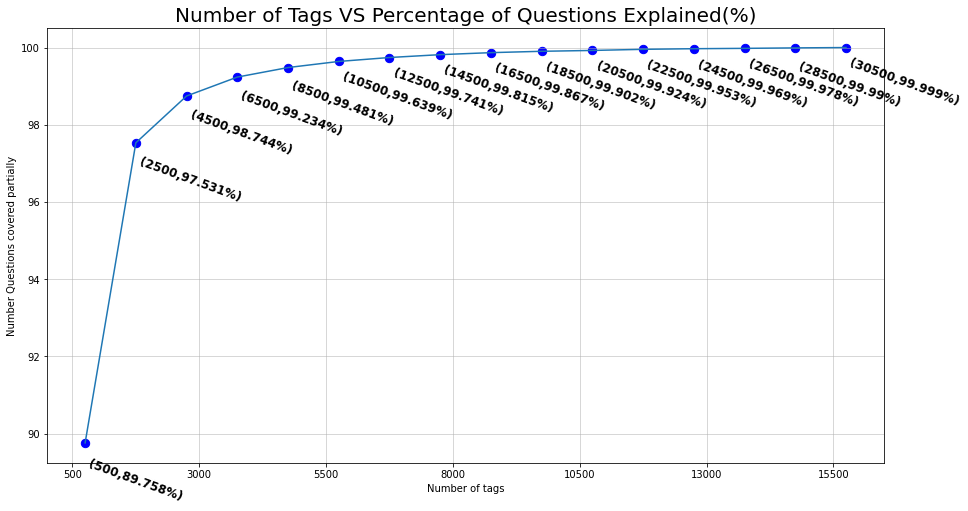

In [69]:
plt.figure(figsize = (20,15))
fig,ax = plt.subplots()
ax.plot(numberOfTags,questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.title("Number of Tags VS Percentage of Questions Explained(%)", fontsize=20)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions covered partially")
plt.grid()

# print("with ",5500,"tags we are covering",questions_explained[50],"% of questions")
plt.scatter(x = numberOfTags,y = questions_explained,c = 'blue',s = 70)
for x,y in zip(numberOfTags,questions_explained):
    plt.annotate(s = '({},{}%)'.format(x,y),xy = (x,y),fontweight = 'bold',fontsize = 12,xytext = (x+70,y-1.5),rotation = -20)
    plt.grid(linestyle = '-',linewidth = 0.5)
plt.show()

In [70]:
multilabel_yx = tags_to_choose(500)
print("number of tags taken : ",multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

number of tags taken :  500 ( 1.6302575806977502 %)


### Split the data into test and train (80:20)

In [71]:
total_size = preprocessed_data.shape[0]
train_size = int(0.8*total_size)

x_train = preprocessed_data.head(train_size)
x_test = preprocessed_data.tail(total_size-train_size)

y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

In [72]:
print("Number of data points in train data : ",y_train.shape)
print("Number of data points in test data : ",y_test.shape)

Number of data points in train data :  (399999, 500)
Number of data points in test data :  (100000, 500)


# Featurinzing data

In [73]:
start = datetime.now()
vectorizer2 = TfidfVectorizer(min_df = 0.00009,max_features = 200000,smooth_idf = True,norm = 'l2',
                            tokenizer = lambda x: x.split(),sublinear_tf = False,ngram_range = (1,3))
x_train_multilabel = vectorizer2.fit_transform(x_train['question'])

print("Time taken to run this cell : ",datetime.now()-start)

Time taken to run this cell :  0:05:44.892609


In [74]:
x_test_multilabel = vectorizer2.transform(x_test['question'])

In [75]:
print("Dimensions of train data X : ",x_train_multilabel.shape,"Y : ",y_train.shape)
print("Dimensions of test data X : ",x_test_multilabel.shape,"Y : ",y_test.shape)

Dimensions of train data X :  (399999, 89531) Y :  (399999, 500)
Dimensions of test data X :  (100000, 89531) Y :  (100000, 500)


In [76]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss = 'log',alpha = 0.00001,penalty = 'l1'),n_jobs = -1)
classifier.fit(x_train_multilabel,y_train)
predictions = classifier.predict(x_test_multilabel)

print("Accuracy : ",metrics.accuracy_score(y_test,predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))

precision = precision_score(y_test,predictions,average = 'micro')
recall = recall_score(y_test,predictions,average = 'micro')
f1 = f1_score(y_test,predictions,average = 'micro')

print("Micro-average quality numbers")
print("Precision : {:.4f}, Recall : {:.4f}, F1-measure : {:.4f}".format(precision,recall,f1))
print(metrics.classification_report(y_test,predictions))
print("Time Taken to run this cell : ",datetime.now()-start)
              
            

Accuracy :  0.22153
Hamming loss  0.00288646
Micro-average quality numbers
Precision : 0.7092, Recall : 0.3299, F1-measure : 0.4503
              precision    recall  f1-score   support

           0       0.62      0.23      0.34      7672
           1       0.78      0.44      0.56      6918
           2       0.83      0.54      0.65      6698
           3       0.74      0.43      0.55      5969
           4       0.93      0.77      0.84      5433
           5       0.86      0.66      0.75      4948
           6       0.73      0.32      0.44      3293
           7       0.86      0.59      0.70      3107
           8       0.70      0.39      0.50      2983
           9       0.79      0.41      0.54      2979
          10       0.84      0.61      0.70      2872
          11       0.53      0.16      0.25      2759
          12       0.53      0.10      0.17      2683
          13       0.57      0.23      0.32      2364
          14       0.62      0.22      0.32      2236
   

## SVC with One-Vs_rest Classifier

In [77]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss = 'hinge',alpha = 0.00001,penalty = 'l1'),n_jobs = -1)
classifier.fit(x_train_multilabel,y_train)
predictions = classifier.predict(x_test_multilabel)

print("Accuracy : ",metrics.accuracy_score(y_test,predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))

precision = precision_score(y_test,predictions,average = 'micro')
recall = recall_score(y_test,predictions,average = 'micro')
f1 = f1_score(y_test,predictions,average = 'micro')

print("Micro-average quality numbers")
print("Precision : {:.4f}, Recall : {:.4f}, F1-measure : {:.4f}".format(precision,recall,f1))
print(metrics.classification_report(y_test,predictions))
print("Time Taken to run this cell : ",datetime.now()-start)
              

Accuracy :  0.23701
Hamming loss  0.00277232
Micro-average quality numbers
Precision : 0.7915, Recall : 0.3074, F1-measure : 0.4428
              precision    recall  f1-score   support

           0       0.66      0.12      0.21      7672
           1       0.79      0.48      0.60      6918
           2       0.81      0.60      0.69      6698
           3       0.76      0.45      0.56      5969
           4       0.93      0.81      0.87      5433
           5       0.83      0.71      0.77      4948
           6       0.82      0.22      0.35      3293
           7       0.86      0.69      0.76      3107
           8       0.74      0.41      0.53      2983
           9       0.77      0.48      0.59      2979
          10       0.82      0.66      0.73      2872
          11       0.76      0.01      0.02      2759
          12       1.00      0.00      0.00      2683
          13       0.64      0.18      0.28      2364
          14       0.71      0.20      0.32      2236
   


### Final Result:

1. Logistic Regression: Micro F1-Score: 0.4503
2. Support Vector Classifier: Micro F1-Score: 0.4428

Here we have trained only two linear models. Other models like tree based models will not work well here due to high dimension of data. Linear SVM has high time complexity so training 500 models on linear SVM is not feasible. Hence, SGD classifier is the best choice in our case.
